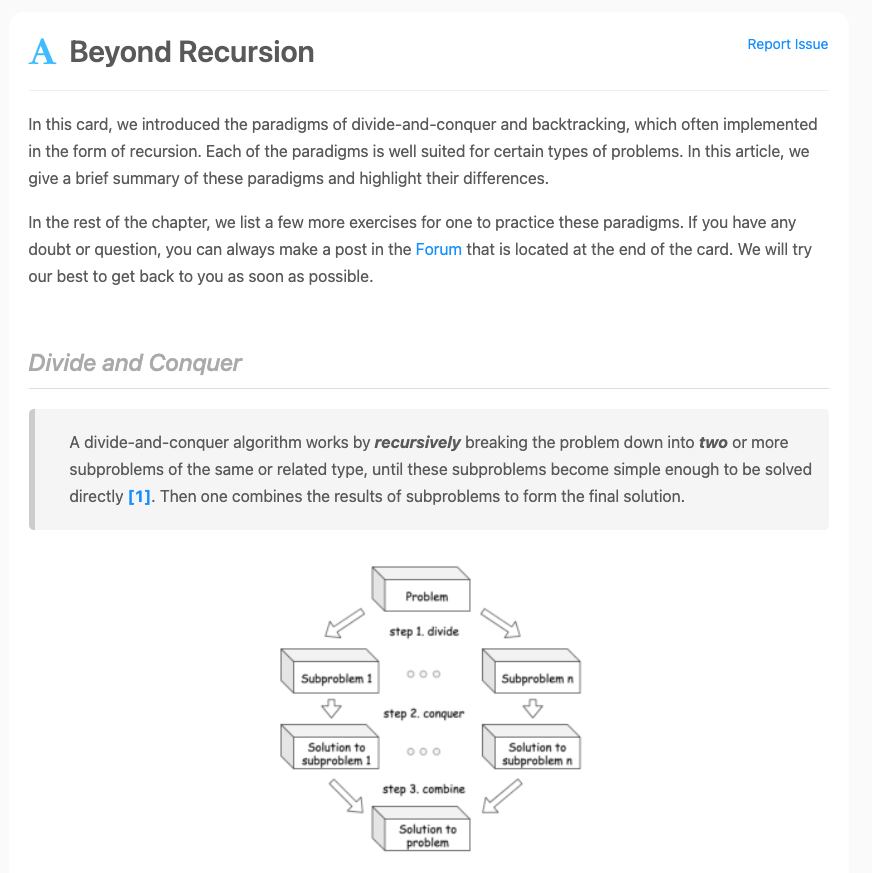

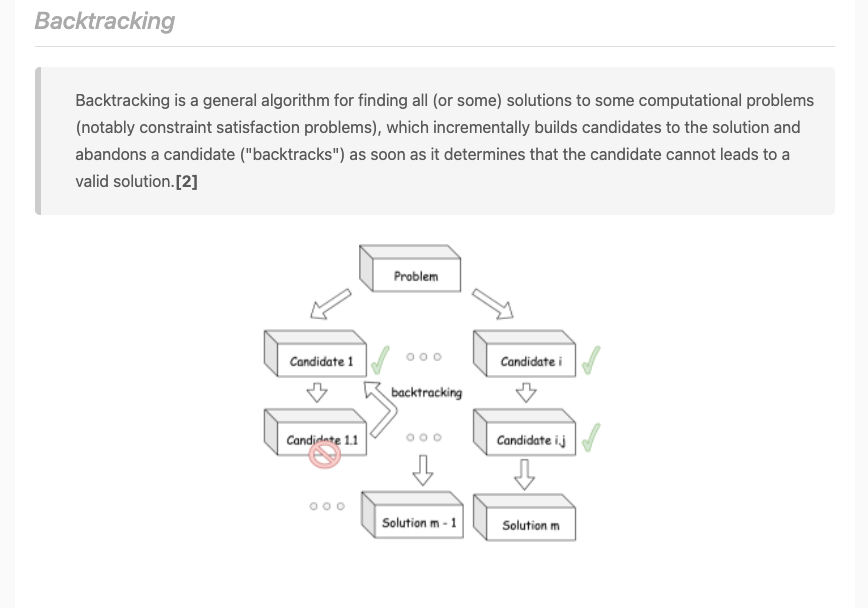

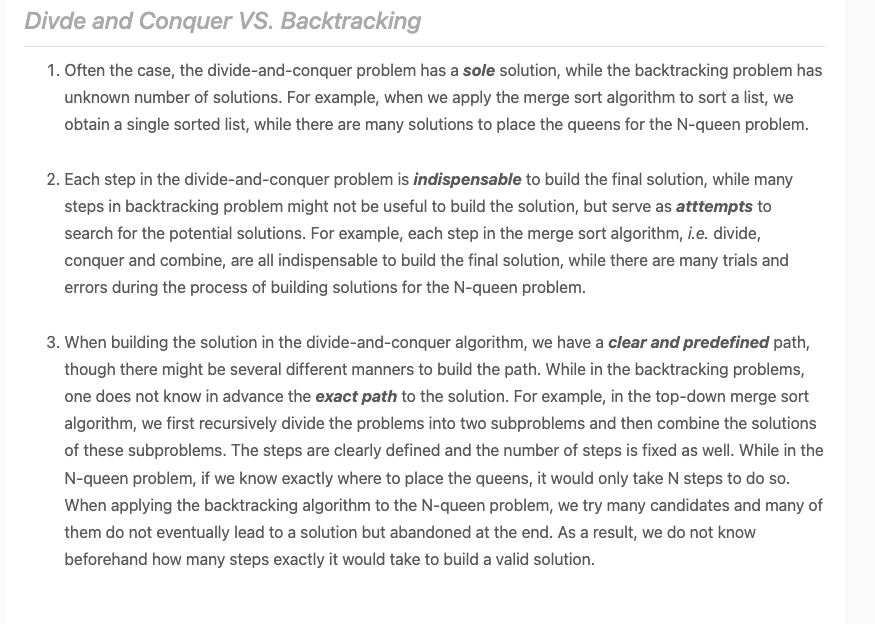

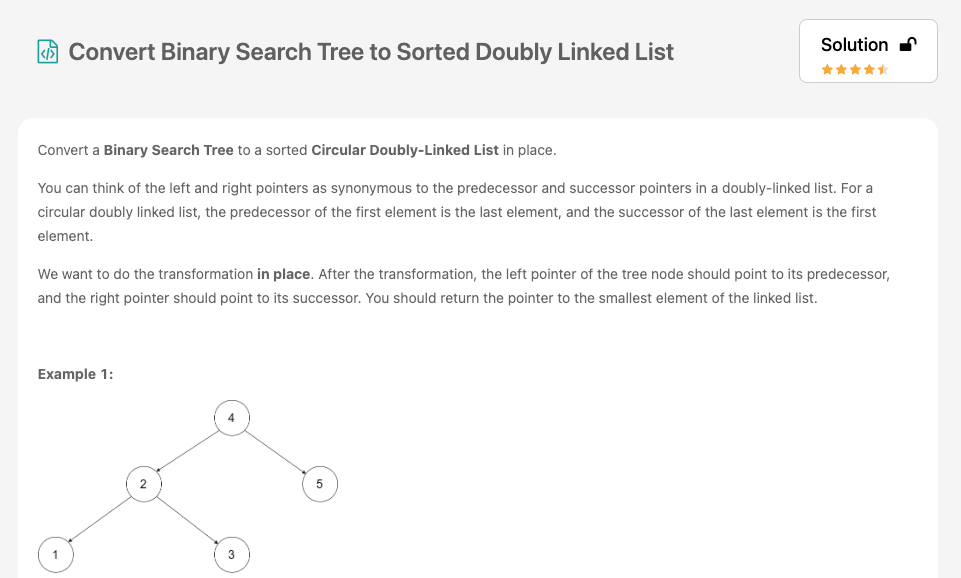

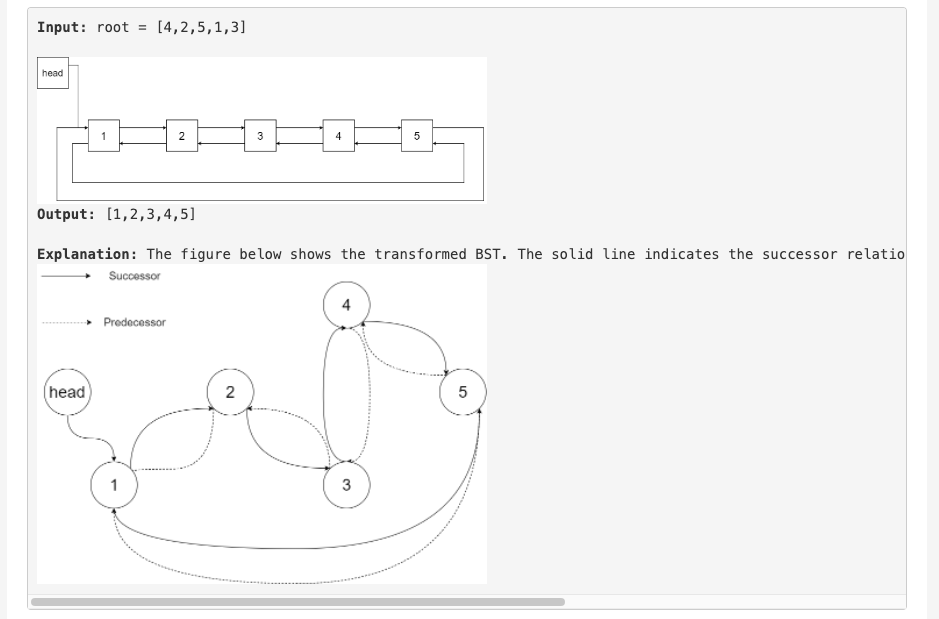

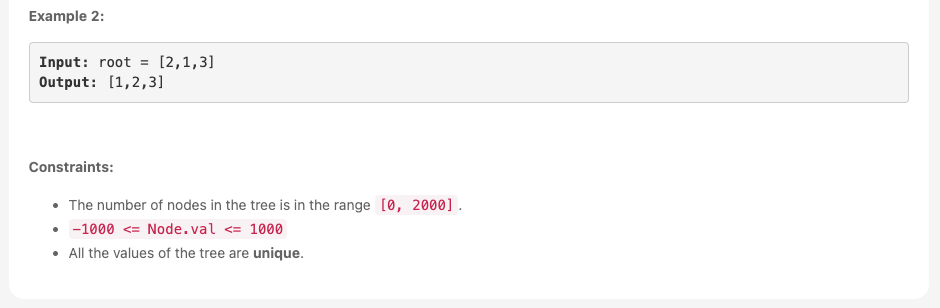

In [ ]:
# Approach 1: Recursion
class Solution:
    def treeToDoublyList(self, root: 'Node') -> 'Node':
        def helper(node):
            """
            Performs standard inorder traversal:
            left -> node -> right
            and links all nodes into DLL
            """
            nonlocal last, first
            if node:
                # left
                helper(node.left)
                # node 
                if last:
                    # link the previous node (last)
                    # with the current one (node)
                    last.right = node
                    node.left = last
                else:
                    # keep the smallest node
                    # to close DLL later on
                    first = node        
                last = node
                # right
                helper(node.right)
        
        if not root:
            return None
        
        # the smallest (first) and the largest (last) nodes
        first, last = None, None
        helper(root)
        # close DLL
        last.right = first
        first.left = last
        return first

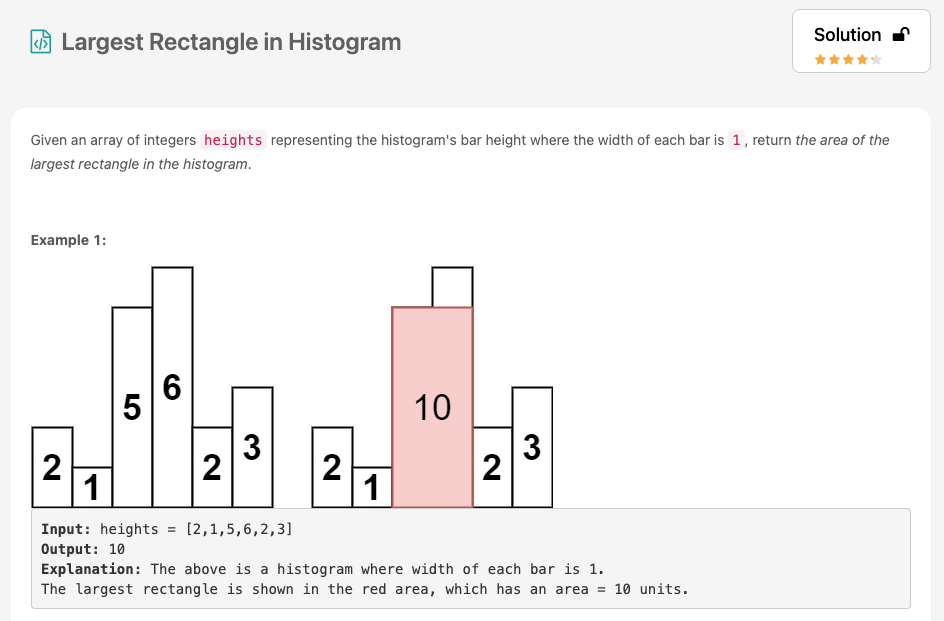

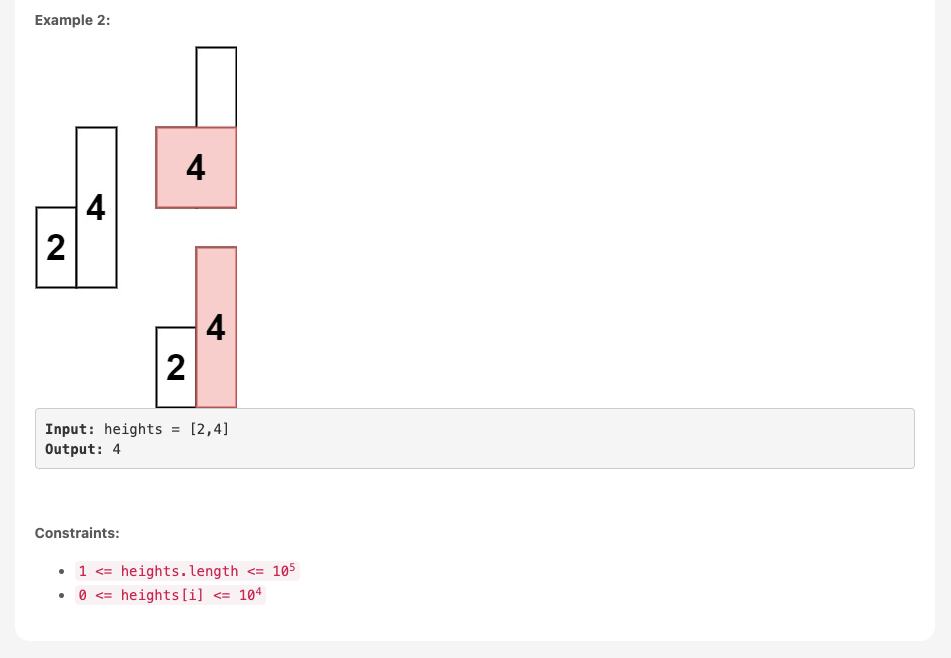

In [ ]:
# Time Exceeded v1
class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        def check_around(i):
            head = i
            tail = i
            base_height = heights[i] 
            while(head-1>=0 and heights[head-1]>=base_height):
                head-=1
            while(tail+1<len(heights) and heights[tail+1]>=base_height):
                tail+=1      
            return (tail-head+1)*base_height
        
        
        if not heights:
            return 0
        
        # Special case
        if max(heights) == min(heights):
            return heights[0]*len(heights)
        
        
        # Normal case
        result_list = []
        for i in range(len(heights)):
            result_list.append(check_around(i))
            
        return max(result_list)

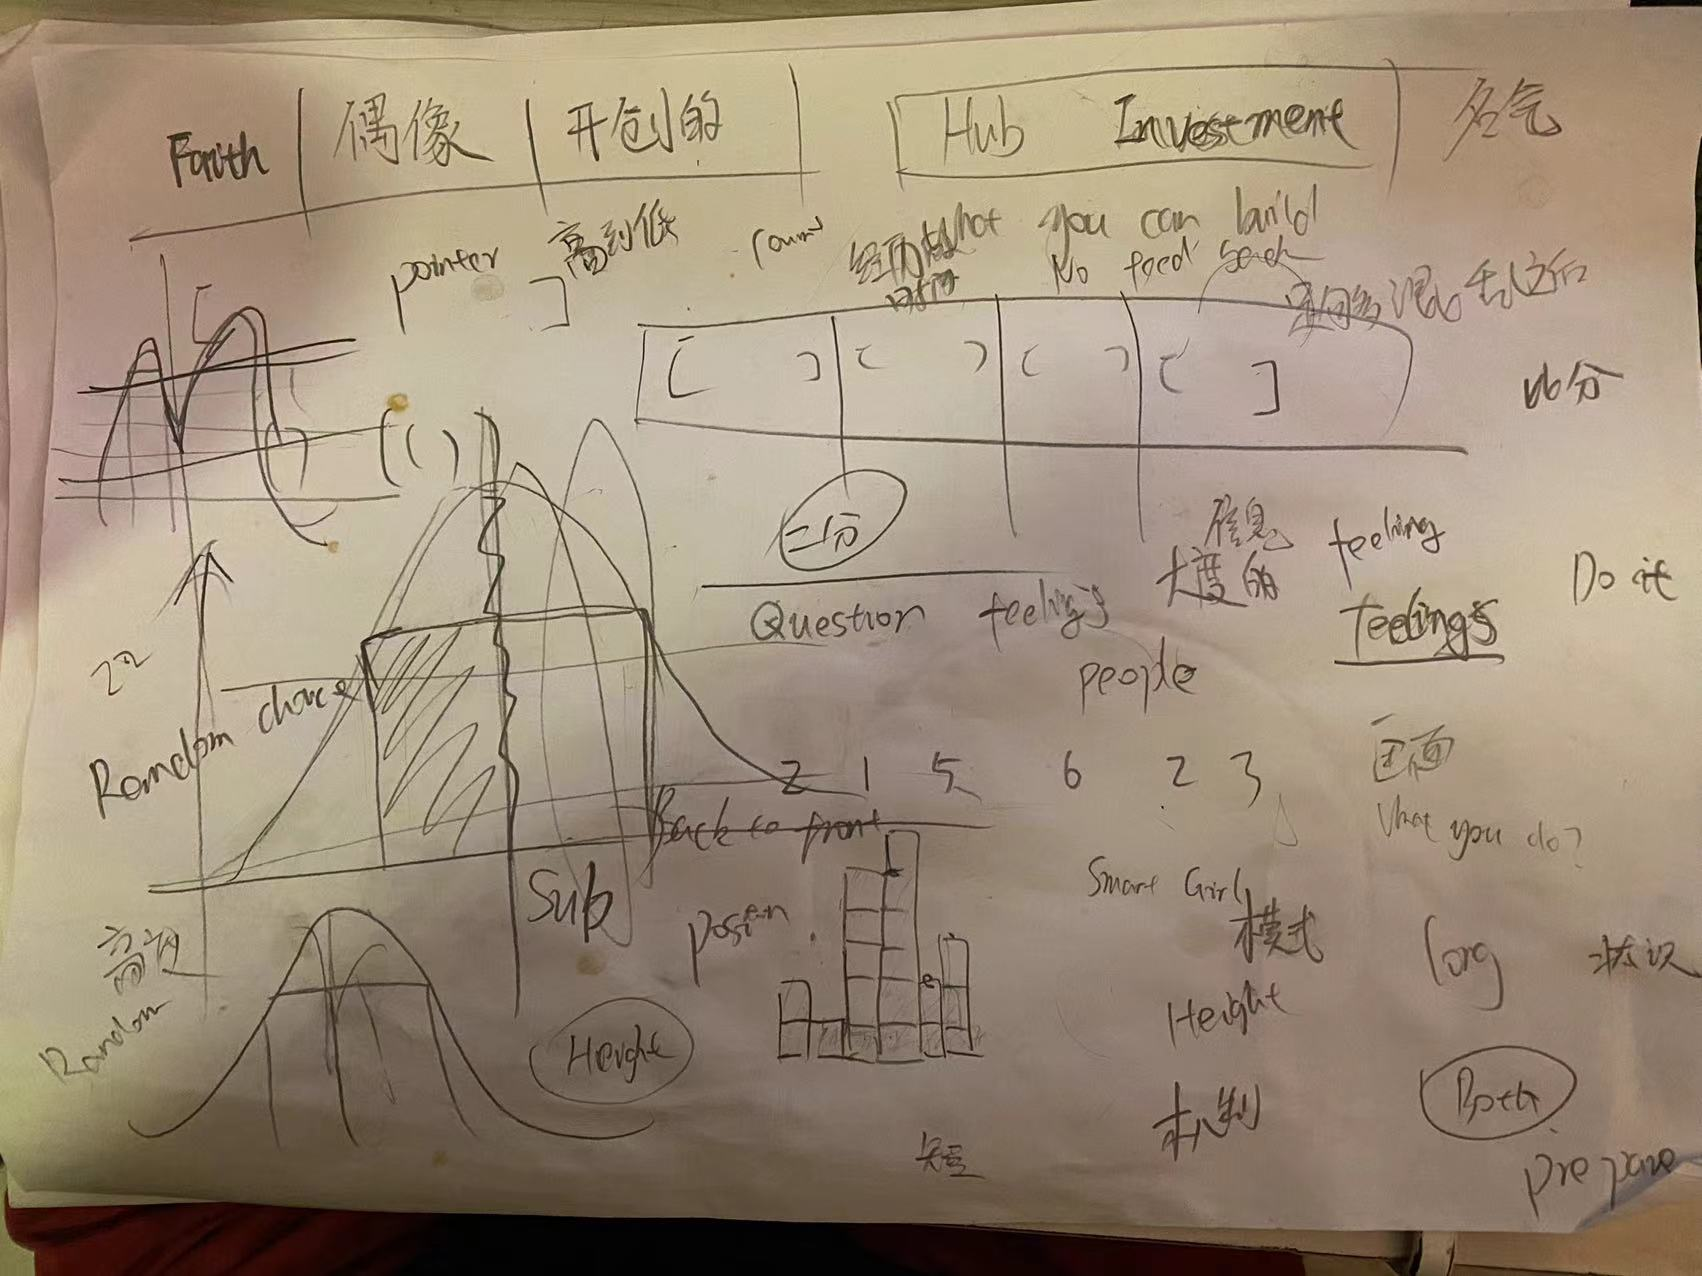

In [ ]:
# Approach 2: Better Brute Force
class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        max_area = 0
        for i in range(len(heights)):
            min_height = inf
            for j in range(i, len(heights)):
                min_height = min(min_height, heights[j])
                max_area = max(max_area, min_height * (j - i + 1))
        return max_area

In [ ]:
# Approach 3: Divide and Conquer Approach
class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        def calculateArea(heights: List[int], start: int, end: int) -> int:
            if start > end:
                return 0
            min_index = start
            for i in range(start, end + 1):
                if heights[min_index] > heights[i]:
                    min_index = i
            return max(
                heights[min_index] * (end - start + 1),
                calculateArea(heights, start, min_index - 1),
                calculateArea(heights, min_index + 1, end),
            )

        return calculateArea(heights, 0, len(heights) - 1)

#### Approach 4: Better Divide and Conquer
```java
// Largest Rectangle in Histogram
// Stack solution, O(NlogN) solution

class SegTreeNode {
public:
  int start;
  int end;
  int min;
  SegTreeNode *left;
  SegTreeNode *right;
  SegTreeNode(int start, int end) {
    this->start = start;
    this->end = end;
    left = right = NULL;
  }
};

class Solution {
public:
  int largestRectangleArea(vector<int>& heights) {
    if (heights.size() == 0) return 0;
    // first build a segment tree
    SegTreeNode *root = buildSegmentTree(heights, 0, heights.size() - 1);
    // next calculate the maximum area recursively
    return calculateMax(heights, root, 0, heights.size() - 1);
  }
  
  int calculateMax(vector<int>& heights, SegTreeNode* root, int start, int end) {
    if (start > end) {
      return -1;
    }
    if (start == end) {
      return heights[start];
    }
    int minIndex = query(root, heights, start, end);
    int leftMax = calculateMax(heights, root, start, minIndex - 1);
    int rightMax = calculateMax(heights, root, minIndex + 1, end);
    int minMax = heights[minIndex] * (end - start + 1);
    return max( max(leftMax, rightMax), minMax );
  }
  
  SegTreeNode *buildSegmentTree(vector<int>& heights, int start, int end) {
    if (start > end) return NULL;
    SegTreeNode *root = new SegTreeNode(start, end);
    if (start == end) {
        root->min = start;
      return root;
    } else {
      int middle = (start + end) / 2;
      root->left = buildSegmentTree(heights, start, middle);
      root->right = buildSegmentTree(heights, middle + 1, end);
      root->min = heights[root->left->min] < heights[root->right->min] ? root->left->min : root->right->min;
      return root;
    }
  }
  
  int query(SegTreeNode *root, vector<int>& heights, int start, int end) {
    if (root == NULL || end < root->start || start > root->end) return -1;
    if (start <= root->start && end >= root->end) {
      return root->min;
    }
    int leftMin = query(root->left, heights, start, end);
    int rightMin = query(root->right, heights, start, end);
    if (leftMin == -1) return rightMin;
    if (rightMin == -1) return leftMin;
    return heights[leftMin] < heights[rightMin] ? leftMin : rightMin;
  }
};
```

In [ ]:
# Approach 5: Using Stack
class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        stack = [-1]
        max_area = 0
        for i in range(len(heights)):
            while stack[-1] != -1 and heights[stack[-1]] >= heights[i]:
                current_height = heights[stack.pop()]
                current_width = i - stack[-1] - 1
                max_area = max(max_area, current_height * current_width)
            stack.append(i)

        while stack[-1] != -1:
            current_height = heights[stack.pop()]
            current_width = len(heights) - stack[-1] - 1
            max_area = max(max_area, current_height * current_width)
        return max_area

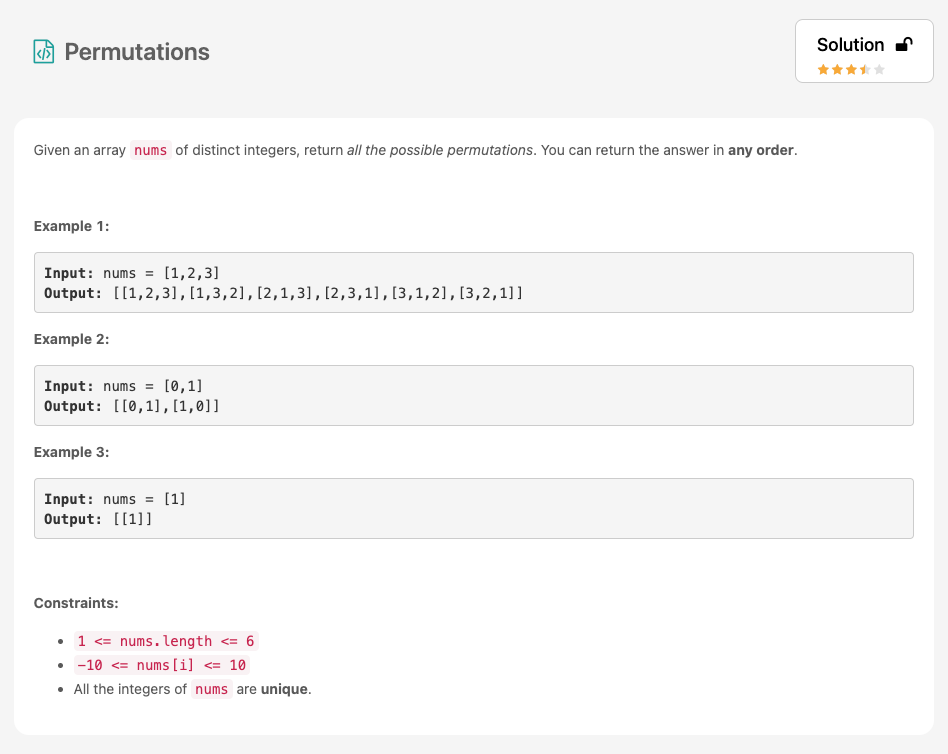

In [ ]:
# Permutations
class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        def helper(nums):
            if len(nums)<=1:
                return [nums,]
            
            x = nums[0]
            nums = nums[1:]
            final_result = []
            base_result = helper(nums)
            for i in range(len(nums)+1):
                for base in base_result:
                    tmp = base[:i] + [x,] + base[i:] 
                    final_result.append(tmp)
            return final_result
        
        return helper(nums)

In [ ]:
# Approach 1: Backtracking
class Solution:
    def permute(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        def backtrack(first = 0):
            # if all integers are used up
            if first == n:  
                output.append(nums[:])
            for i in range(first, n):
                # place i-th integer first 
                # in the current permutation
                nums[first], nums[i] = nums[i], nums[first]
                # use next integers to complete the permutations
                backtrack(first + 1)
                # backtrack
                nums[first], nums[i] = nums[i], nums[first]
        
        n = len(nums)
        output = []
        backtrack()
        return output

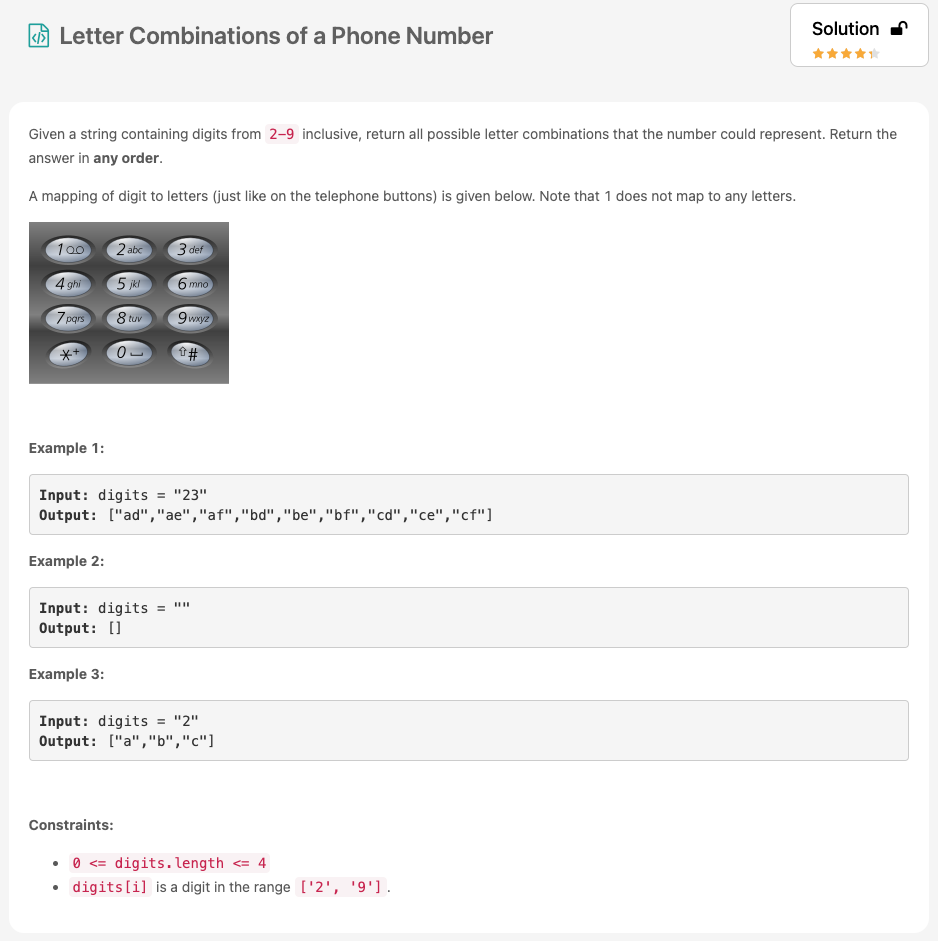

In [ ]:
# Letter Combinations of a Phone Number

class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        letter_mapping = {'2':('a','b','c'),
                          '3':('d','e','f'),
                          '4':('g','h','i'),
                          '5':('j','k','l'),
                          '6':('m','n','o'),
                          '7':('p','q','r','s'),
                          '8':('t','u','v'),
                          '9':('w','x','y','z'),
                        }
        
        def helper(nums):
            if not nums:
                return []
            if len(nums)==1:
                return letter_mapping[nums[0]]
            
            x = nums[0]
            nums = nums[1:]
            result = []
            base_list = helper(nums)
            for y in letter_mapping[x]:
                for z in base_list:
                    result.append(y+z)
                
            return result
        
        return helper(digits) 

In [ ]:
# Backtracking
class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        # If the input is empty, immediately return an empty answer array
        if len(digits) == 0: 
            return []
        
        # Map all the digits to their corresponding letters
        letters = {"2": "abc", "3": "def", "4": "ghi", "5": "jkl", 
                   "6": "mno", "7": "pqrs", "8": "tuv", "9": "wxyz"}
        
        def backtrack(index, path):
            # If the path is the same length as digits, we have a complete combination
            if len(path) == len(digits):
                combinations.append("".join(path))
                return # Backtrack
            
            # Get the letters that the current digit maps to, and loop through them
            possible_letters = letters[digits[index]]
            for letter in possible_letters:
                # Add the letter to our current path
                path.append(letter)
                # Move on to the next digit
                backtrack(index + 1, path)
                # Backtrack by removing the letter before moving onto the next
                path.pop()

        # Initiate backtracking with an empty path and starting index of 0
        combinations = []
        backtrack(0, [])
        return combinations

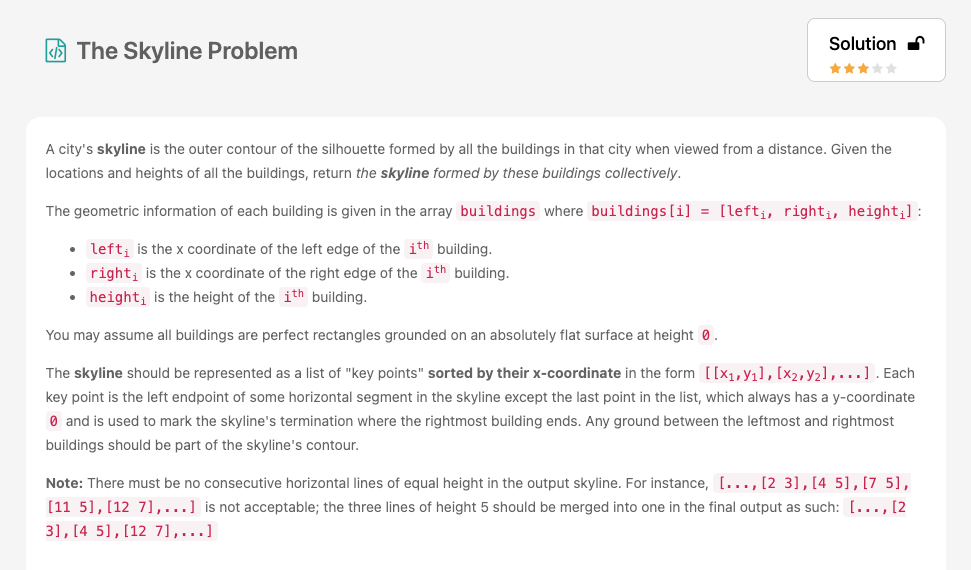

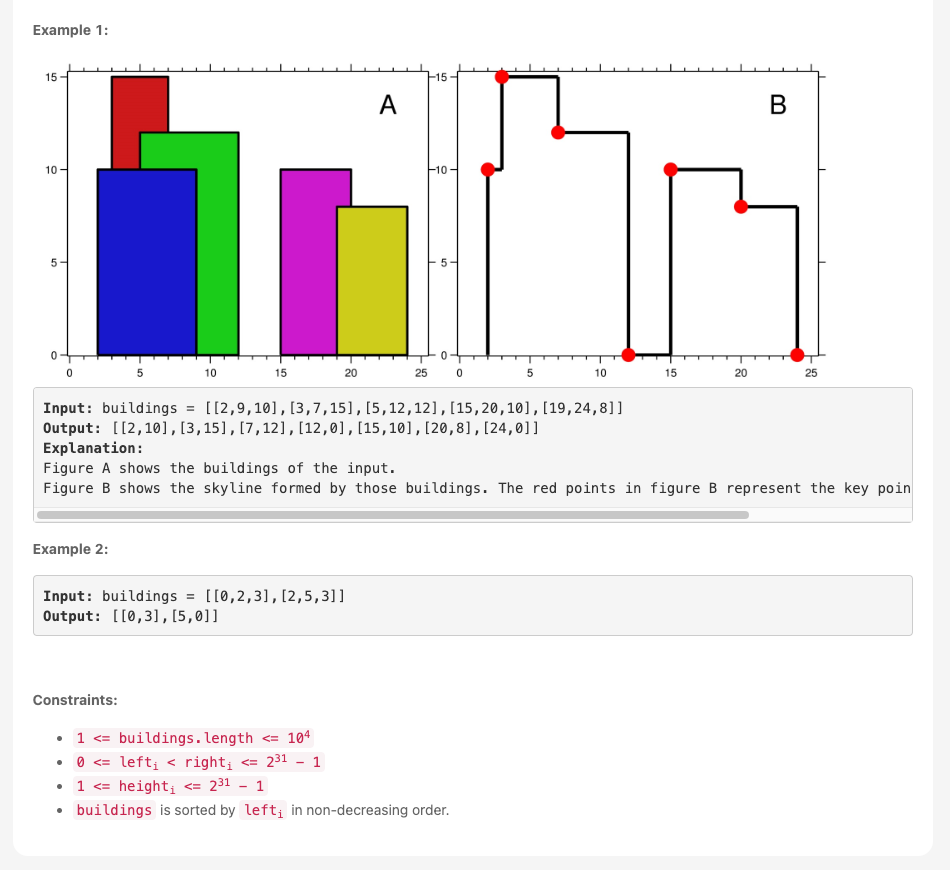

In [ ]:
# The Skyline Problem

In [ ]:
# Failed v1
from collections import deque
class Solution:
    def getSkyline(self, buildings: List[List[int]]) -> List[List[int]]:
        head_stack = deque()
        tail_stack = deque()
        
        for i,x in enumerate(buildings):
            head_stack.append([x[0],x[2],i])
            tail_stack.append([x[1],x[2],i])

            
        shapes = []
        while(head_stack and tail_stack):
            head = head_stack.popleft()
            tail = tail_stack[0]
            print(tail)
            
            if head[0]>tail[0]:
                shapes.append([tail[1],0])
                shapes.append([head[0], head[1]])
                tail_stack.popleft()
            else:
                if head[1]>tail[1]:
                    shapes.append(head)
                else:
                    if head[2]<tail[2]:
                        
                    
        return shapes
            

In [ ]:
# Failed v2
from collections import deque
class Solution:
    def getSkyline(self, buildings: List[List[int]]) -> List[List[int]]:
        cur_stack = deque()
        stagging_stack = deque()
        
        for i,x in enumerate(buildings):
            cur_stack.append(x)

            
        shapes = []
        while(cur_stack):
            cur = cur_stack.popleft()
            if not stagging_stack:
                shapes.append([cur[0],cur[2]])
                stagging_stack.append(cur)
            else:
                pre = stagging_stack[0]
                
                # Case1
                ####
                ####   @@@@
                ####   @@@@
                
                if cur[0]>pre[1]:
                    shapes.append([pre[1], 0])
                    shapes.append([cur[0], cur[2]])
                    stagging_stack.popleft()
                     
                else:
  
                    if cur[1] > pre[1]:
                        if cur[2]<pre[2]:
                            # Case2.1
                            #######
                            #######
                            ####@@@@@@
                            ####@@@@@@
                            ####@@@@@@    
                            shapes.append([pre[1], cur[2]])
                            stagging_stack.append(cur)
                            # ?????
                        else:
                            # Case 2.2
                               #@@@@@@
                               #@@@@@@
                            ####@@@@@@
                            ####@@@@@@
                            ####@@@@@@
                            ####@@@@@@
                            ####@@@@@@   
                            shapes.append([cur[0], cur[2]])
                            stagging_stack.append(cur)
                            stagging_stack.popleft()

                    else:
                        if cur[2]<pre[2]:
                            # Case3.1
                            #############
                            #############
                            ####@@@@@@###
                            ####@@@@@@###
                            ####@@@@@@###
                            pass
                        else:
                            # Case3.2
                                #@@@@@
                                #@@@@@
                            ####@@@@@@###
                            ####@@@@@@###
                            ####@@@@@@###
                            ####@@@@@@###
                            ####@@@@@@###   
                            shapes.append([cur[0], cur[2]])
                            shapes.append([cur[1], pre[2]])
                            stagging_stack.append(cur)
                            # Case 3.3?????


        return shapes

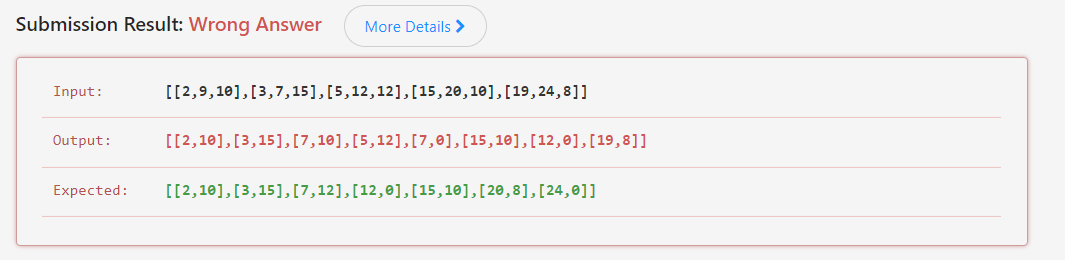

In [ ]:
# Failed v2
from collections import deque
class Solution:
    def getSkyline(self, buildings: List[List[int]]) -> List[List[int]]:

        def helper(shapes, building):
            if not shapes:
                shapes.append([building[0], building[2]])
                shapes.append([building[1],building[2]])
                return shapes
            else:
                new_shape_list = []
                pre = None
                for shape in shapes:
                    if shape[0] < building[0]:
                        new_shape.append(shape)
                        pre = shape
                    else:
                        if shape[0] < building[1]:
                            if shape[1]<building[2]:
                                new_shape = [building[0],building[1]]
                                new_shape_list.append(new_shape)
                                pre = new_shape
                            else:
                                new_shape = [shape[0],building[1]]
                                new_shape_list.append(new_shape)
                                pre = new_shape
                        else:
                            if shape[1]<building[2]:
                                new_shape = [building[0],building[2]]
                                new_shape_list.append(new_shape)
                                
                                new_shape = [building[1],shape[1]]
                                new_shape_list.append(new_shape)                        
                                
                                new_shape_list.append(shape)
                                pre = shape
                            else:
                                new_shape_list.append(shape)
                                pre = shape
            return new_shape_list
            
        shapes = []
        for building in buildings:
            shapes =helper(shapes, building)
            
        return shapes
        


In [ ]:
# Failed v3
# Failed v2
from collections import deque
class Solution:
    def getSkyline(self, buildings: List[List[int]]) -> List[List[int]]:

        def helper(shapes, building):
            if (not shapes) or (building[0]>shapes[-1][0]):
                shapes.append([building[0], building[2]])
                shapes.append([building[1],0])
                return shapes
            else:
                touched = False
                new_shape_list = []
                pre = None
                new_shape = None
                for shape in shapes:
                    if shape[0] < building[0] or (touched and shape[0] > building[1]):
                        new_shape_list.append(shape)   
                        #print(1)
                    else:
                        if shape[0] < building[1]:
                            print(2)
                            print('shape:',shape)
                            print('pre:',pre)
                            print('building:',building)
                            if shape[1]<building[2]:
                                print(2.1)
                                if pre[1] > building[2]:
                                    print('2.1.1')
                                    new_shape = [shape[0],building[2]]
                                    new_shape_list.append(new_shape)
                                    print('new_shape:',new_shape)
                                else:
                                    print('2.1.2')
                                    new_shape = [building[0],building[2]]
                                    new_shape_list.append(new_shape) 
                                    print('new_shape:',new_shape)
                            else:
                                print(2.2)
                                new_shape = [shape[0],building[2]]
                                new_shape_list.append(new_shape)
                        else:
                            print(3)
                            if shape[1]<building[2]:
                                new_shape = [building[0],building[2]]
                                print(new_shape)
                                new_shape_list.append(new_shape)
                                
                                new_shape = [building[1],pre[1]]
                                print(new_shape)
                                new_shape_list.append(new_shape)                        
                                
                                new_shape_list.append(shape)
                                print(shape)
                            else:
                                print(3.2)
                                new_shape_list.append(shape)
                            touched = True
                               
                    pre = shape
                    if new_shape and pre[0] == new_shape[0]:
                        print(4)
                        pre = new_shape

            if building[1]>new_shape_list[-1][0]:
                print(5)
                print(building)
                print(new_shape_list)
                new_shape = [building[1],0]
                new_shape_list.append(new_shape)
                        
                        
            new_shape_list_II = []
            pre = [-1,-1]
            for x in new_shape_list:
                if x[0]>=pre[0] and x[1]!=pre[1]:
                    new_shape_list_II.append(x)
                    pre = x
                        
                        
            return new_shape_list_II
            
        shapes = []
        for building in buildings:
            print('Building:',building)
            shapes = helper(shapes, building)
            print('Shapes:',shapes)
            
        return shapes
        
    

In [ ]:
"""
How to simplify??????


"""

In [ ]:
# Approach 1: Divide and Conquer

class Solution:
    def getSkyline(self, buildings: 'List[List[int]]') -> 'List[List[int]]':
        """
        Divide-and-conquer algorithm to solve skyline problem,
        which is similar with the merge sort algorithm.
        """
        n = len(buildings)
        # The base cases
        if n == 0:
            return []
        if n == 1:
            x_start, x_end, y = buildings[0]
            return [[x_start, y], [x_end, 0]]

        # If there is more than one building,
        # recursively divide the input into two subproblems.
        left_skyline = self.getSkyline(buildings[: n // 2])
        right_skyline = self.getSkyline(buildings[n // 2 :])

        # Merge the results of subproblem together.
        return self.merge_skylines(left_skyline, right_skyline)

    def merge_skylines(self, left, right):
        """
        Merge two skylines together.
        """
        def update_output(x, y):
            """
            Update the final output with the new element.
            """
            # if skyline change is not vertical -
            # add the new point
            if not output or output[-1][0] != x:
                output.append([x, y])
            # if skyline change is vertical -
            # update the last point
            else:
                output[-1][1] = y

        def append_skyline(p, lst, n, y, curr_y):
            """
            Append the rest of the skyline elements with indice (p, n)
            to the final output.
            """
            while p < n:
                x, y = lst[p]
                p += 1
                if curr_y != y:
                    update_output(x, y)
                    curr_y = y

        n_l, n_r = len(left), len(right)
        p_l = p_r = 0
        curr_y  = left_y = right_y = 0
        output = []

        # while we're in the region where both skylines are present
        while p_l < n_l and p_r < n_r:
            point_l, point_r = left[p_l], right[p_r]
            # pick up the smallest x
            if point_l[0] < point_r[0]:
                x, left_y = point_l
                p_l += 1
            else:
                x, right_y = point_r
                p_r += 1
            # max height (i.e. y) between both skylines
            max_y = max(left_y, right_y)
            # if there is a skyline change
            if curr_y != max_y:
                update_output(x, max_y)
                curr_y = max_y

        # there is only left skyline
        append_skyline(p_l, left, n_l, left_y, curr_y)

        # there is only right skyline
        append_skyline(p_r, right, n_r, right_y, curr_y)

        return output